

 # Import Libaries 




In [32]:
#import libaries
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load Data

In [2]:
# Load ARFF file using scipy

arff_file_path = '/Users/nazira/Downloads/dataset_37_diabetes.arff'
data, meta = arff.loadarff(arff_file_path)
df = pd.DataFrame(data)

# Convert string value to numeric value if needed
df['class'] = df['class'].map({b'tested_positive': 1, b'tested_negative': 0})

# Save DataFrame to CSV file
csv_file_path = '/Users/nazira/Downloads/dataset_37_diabetes.csv'
df.to_csv(csv_file_path, index=False)

print(df.head(30))



    preg   plas  pres  skin   insu  mass   pedi   age  class
0    6.0  148.0  72.0  35.0    0.0  33.6  0.627  50.0      1
1    1.0   85.0  66.0  29.0    0.0  26.6  0.351  31.0      0
2    8.0  183.0  64.0   0.0    0.0  23.3  0.672  32.0      1
3    1.0   89.0  66.0  23.0   94.0  28.1  0.167  21.0      0
4    0.0  137.0  40.0  35.0  168.0  43.1  2.288  33.0      1
5    5.0  116.0  74.0   0.0    0.0  25.6  0.201  30.0      0
6    3.0   78.0  50.0  32.0   88.0  31.0  0.248  26.0      1
7   10.0  115.0   0.0   0.0    0.0  35.3  0.134  29.0      0
8    2.0  197.0  70.0  45.0  543.0  30.5  0.158  53.0      1
9    8.0  125.0  96.0   0.0    0.0   0.0  0.232  54.0      1
10   4.0  110.0  92.0   0.0    0.0  37.6  0.191  30.0      0
11  10.0  168.0  74.0   0.0    0.0  38.0  0.537  34.0      1
12  10.0  139.0  80.0   0.0    0.0  27.1  1.441  57.0      0
13   1.0  189.0  60.0  23.0  846.0  30.1  0.398  59.0      1
14   5.0  166.0  72.0  19.0  175.0  25.8  0.587  51.0      1
15   7.0  100.0   0.0   

# Data Discreption


Number of Instances: 768

Number of Attributes: 8 plus class

For Each Attribute: (all numeric-valued)

preg: Number of times pregnant
plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
pres: Diastolic blood pressure (mm Hg)
skin: Triceps skin fold thickness (mm)
insu: 2-Hour serum insulin (mu U/ml)
mass: Body mass index (weight in kg/(height in m)^2)
pedi: Diabetes pedigree function
age: Age in years

Class variable (0 or 1)
Missing Attribute Values: None

Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

Brief statistical analysis:

Attribute number: Mean:        Standard Deviation:

   1.             3.8          3.4
   2.             120.9        32.0
   3.             69.1         19.4
   4.             20.5         16.0
   5.             79.8         115.2
   6.             32.0         7.9
   7.             0.5          0.3
   8.             33.2         11.8


# Data Exploration and Feature Analysis


In [3]:
# Count the number of unique values in each column
unique_counts = df.nunique()

# Display the results
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
preg      17
plas     136
pres      47
skin      51
insu     186
mass     248
pedi     517
age       52
class      2
dtype: int64


In [4]:
# Display the data types of each column
data_types = df.dtypes

# Display the results
print("Data types of each column:")
print(data_types)

Data types of each column:
preg     float64
plas     float64
pres     float64
skin     float64
insu     float64
mass     float64
pedi     float64
age      float64
class      int64
dtype: object


In [5]:
# Display the range of values in each column
feature_ranges = df.max() - df.min()

# Display the results
print("Range of values in each column:")
print(feature_ranges)


Range of values in each column:
preg      17.000
plas     199.000
pres     122.000
skin      99.000
insu     846.000
mass      67.100
pedi       2.342
age       60.000
class      1.000
dtype: float64


**There is big difference between range of different features, we need to scale data.**

In [6]:
# in order to underestand if their imbalance between the number of categories, we calculate the total number of each category

y_1 = df[df['class'] == 1].shape[0]
y_0 = df[df['class'] == 0].shape[0]

print(f"The total number of y_1 is {y_1}")
print(f"The total number of y_0 is {y_0}")

The total number of y_1 is 268
The total number of y_0 is 500


**There is imbalance between the number of categories, we will resampel it.**

In [7]:
# check in wich columns we have unlogic 0 values

columns_to_check = ['plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'preg']

for column_name in columns_to_check:
    sum_of_zeros = (df[column_name] == 0).sum()
    print(f"The column '{column_name}' has {sum_of_zeros} zero values.")



The column 'plas' has 5 zero values.
The column 'pres' has 35 zero values.
The column 'skin' has 227 zero values.
The column 'insu' has 374 zero values.
The column 'mass' has 11 zero values.
The column 'pedi' has 0 zero values.
The column 'age' has 0 zero values.
The column 'preg' has 111 zero values.


It doesn't make sense that the 'plas', 'pres', 'skin', and 'mass' columns include zero values. Given this observation, it is possible that these zeros are indicative of missing values. While it is plausible for the 'insu' column to contain zeros, having 374 exact zero values raises concerns.

One potential explanation for the abundance of zeros in the 'insu' column could be the concept of an 'Assay Limit.' The laboratory assay used to measure insulin might have a lower limit of detection, and values below this limit could be recorded as zero. To address this uncertainty, we will train the model in two possible scenarios.

In the first scenario, we will consider the zeros as legitimate values, as suggested by the data provider. This approach acknowledges the possibility that zero values in certain columns may carry meaning rather than indicating missing data. in second scenario, we will replace unlogic zeros with mean.


# Exploratory data analysis 

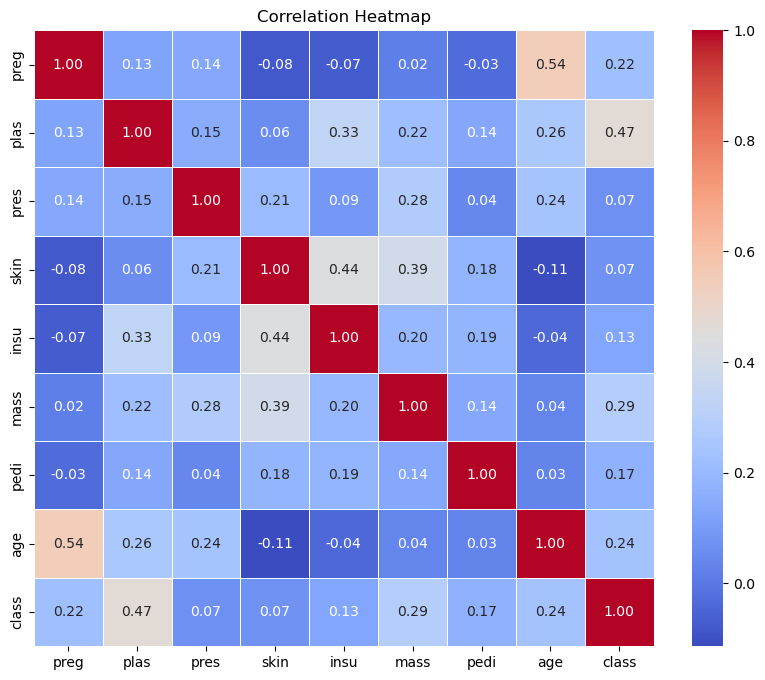

In [8]:
# check the correlation between features and target variable.


features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
X = df[features]
y = df['class']

correlation_matrix = X.join(y).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


**There is less correlation between 'pres', 'skin' by target value ' class'. 'plas' has highst correlation with 'class'**

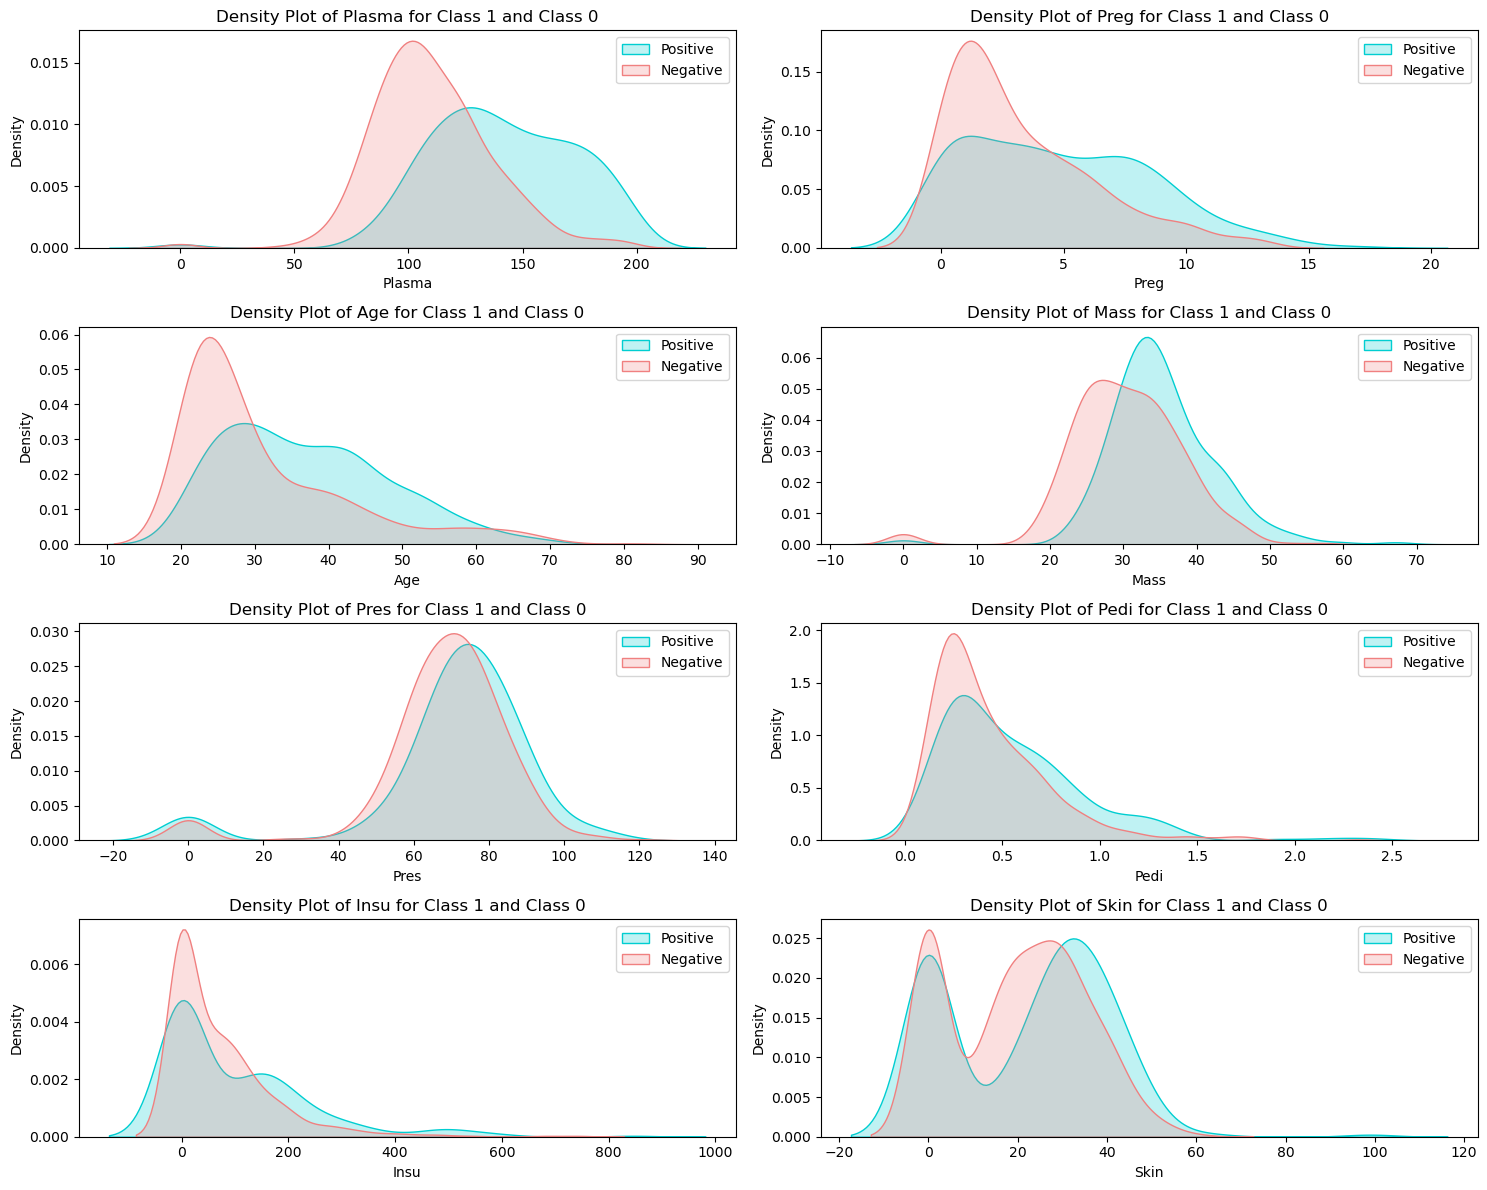

In [9]:
# plot contribution of features to each category


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))

# Plot the first density plot (Plasma)
ax1 = sns.kdeplot(df.loc[df["class"] == 1, "plas"], color="darkturquoise", fill=True, ax=axes[0, 0])
sns.kdeplot(df.loc[df["class"] == 0, "plas"], color="lightcoral", fill=True, ax=axes[0, 0])
ax1.legend(['Positive', 'Negative'])
ax1.set_title('Density Plot of Plasma for Class 1 and Class 0')
ax1.set(xlabel='Plasma')

# Plot the second density plot (Pregnancy)
ax2 = sns.kdeplot(df.loc[df["class"] == 1, "preg"], color="darkturquoise", fill=True, ax=axes[0, 1])
sns.kdeplot(df.loc[df["class"] == 0, "preg"], color="lightcoral", fill=True, ax=axes[0, 1])
ax2.legend(['Positive', 'Negative'])
ax2.set_title('Density Plot of Preg for Class 1 and Class 0')
ax2.set(xlabel='Preg')

# Plot the third density plot (Age)
ax3 = sns.kdeplot(df.loc[df["class"] == 1, "age"], color="darkturquoise", fill=True, ax=axes[1, 0])
sns.kdeplot(df.loc[df["class"] == 0, "age"], color="lightcoral", fill=True, ax=axes[1, 0])
ax3.legend(['Positive', 'Negative'])
ax3.set_title('Density Plot of Age for Class 1 and Class 0')
ax3.set(xlabel='Age')

# Plot the fourth density plot (Mass)
ax4 = sns.kdeplot(df.loc[df["class"] == 1, "mass"], color="darkturquoise", fill=True, ax=axes[1, 1])
sns.kdeplot(df.loc[df["class"] == 0, "mass"], color="lightcoral", fill=True, ax=axes[1, 1])
ax4.legend(['Positive', 'Negative'])
ax4.set_title('Density Plot of Mass for Class 1 and Class 0')
ax4.set(xlabel='Mass')

# Plot the fifth density plot (Pres)
ax5 = sns.kdeplot(df.loc[df["class"] == 1, "pres"], color="darkturquoise", fill=True, ax=axes[2, 0])
sns.kdeplot(df.loc[df["class"] == 0, "pres"], color="lightcoral", fill=True, ax=axes[2, 0])
ax5.legend(['Positive', 'Negative'])
ax5.set_title('Density Plot of Pres for Class 1 and Class 0')
ax5.set(xlabel='Pres')

# Plot the sixth density plot (Pedi)
ax6 = sns.kdeplot(df.loc[df["class"] == 1, "pedi"], color="darkturquoise", fill=True, ax=axes[2, 1])
sns.kdeplot(df.loc[df["class"] == 0, "pedi"], color="lightcoral", fill=True, ax=axes[2, 1])
ax6.legend(['Positive', 'Negative'])
ax6.set_title('Density Plot of Pedi for Class 1 and Class 0')
ax6.set(xlabel='Pedi')

# Plot the seventh density plot (insu)
ax7 = sns.kdeplot(df.loc[df["class"] == 1, "insu"], color="darkturquoise", fill=True, ax=axes[3, 0])
sns.kdeplot(df.loc[df["class"] == 0, "insu"], color="lightcoral", fill=True, ax=axes[3, 0])
ax7.legend(['Positive', 'Negative'])
ax7.set_title('Density Plot of Insu for Class 1 and Class 0')
ax7.set(xlabel='Insu')

# Plot the eighth density plot (skin)
ax8 = sns.kdeplot(df.loc[df["class"] == 1, "skin"], color="darkturquoise", fill=True, ax=axes[3, 1])
sns.kdeplot(df.loc[df["class"] == 0, "skin"], color="lightcoral", fill=True, ax=axes[3, 1])
ax8.legend(['Positive', 'Negative'])
ax8.set_title('Density Plot of Skin for Class 1 and Class 0')
ax8.set(xlabel='Skin')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()




**By conducting this visualization, we observe that the 'skin' and 'insu' columns contribute almost equally to both positive and negative categories. This similarity in contribution suggests that these features may have less importance in the prediction process.**

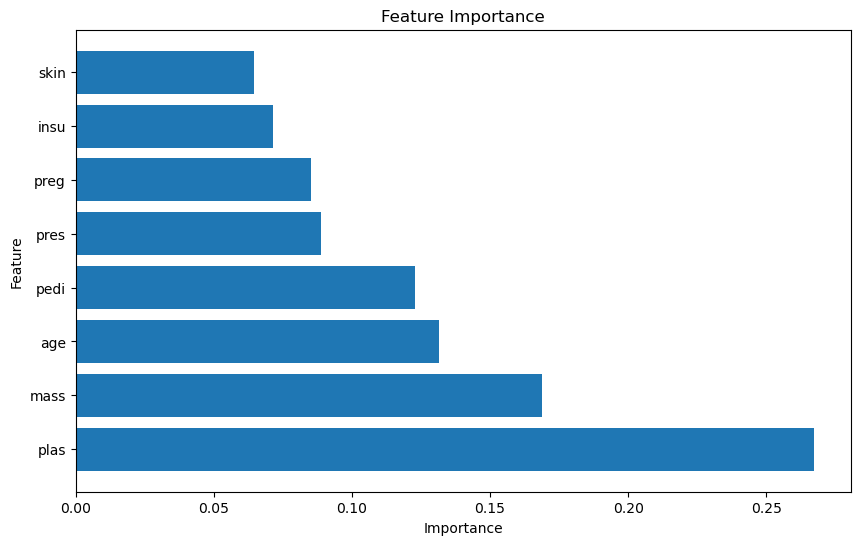

In [10]:
# we will check feature importances


rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

**we can see the 'skin' is less important feature in this data**

# Define x_train, y_train(1)

In [11]:
#define and reshape X_train to convient for split data 
X = np.array(df[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']])
y = np.array(df['class'])

X = X.reshape((768, 8))  

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs X is: (768, 8)
the shape of the targets y is: (768,)


# split the dataset into training, CV , test sets(1)

In [12]:

x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross-validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross-validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

del x_, y_

the shape of the inputs X is: (768, 8)
the shape of the targets y is: (768,)
the shape of the training set (input) is: (460, 8)
the shape of the training set (target) is: (460,)

the shape of the cross-validation set (input) is: (154, 8)
the shape of the cross-validation set (target) is: (154,)

the shape of the test set (input) is: (154, 8)
the shape of the test set (target) is: (154,)


In [13]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


# Feature Engeneering 

In [13]:
# Fit PolynomialFeatures  on the training set, we wil begin with poly_degree 2
# we got underfitting problem with degree 1.

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

# Scale the polynomial features
scaler_linear = StandardScaler()
x_train_poly_scaled = scaler_linear.fit_transform(x_train_poly)
x_cv_poly_scaled = scaler_linear.transform(x_cv_poly)
x_test_poly_scaled = scaler_linear.transform(x_test_poly)

# Resample imbalanced data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_poly_scaled_resampled, y_train_resampled = oversampler.fit_resample(x_train_poly_scaled, y_train)



# Train and evaluate model with Logistic regression (1)

In [14]:
# Create and train a logistic regression model

logreg_model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
logreg_model.fit(x_train_poly_scaled_resampled, y_train_resampled)


# make prediction with training set
yhat_train = logreg_model.predict(x_train_poly_scaled_resampled)

# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train_resampled, yhat_train)

# Calculate precision, recall, and f1 for training set
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)

# Print the confusion matrix, accuracy, precision, recall, f1 for training set
print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")



# Make predictions on the cross validation set

yhat_cv = logreg_model.predict(x_cv_poly_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_cv, yhat_cv)

# Calculate accuracy
accuracy = accuracy_score(y_cv, yhat_cv)

# calculate the precision,recall, f1 
precision = precision_score(y_cv, yhat_cv)
recall = recall_score(y_cv, yhat_cv)
f1 = f1_score(y_cv, yhat_cv)



# Now, print the results for the cross-validation set
print("\nCross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Training Set Results:
Confusion Matrix:
[[241  60]
 [ 75 226]]

Accuracy: 0.7757475083056479
Precision: 0.7902097902097902
Recall: 0.7508305647840532
F1 Score: 0.7700170357751278

Cross-Validation Set Results:
Confusion Matrix:
[[77 18]
 [18 41]]

Accuracy: 0.7662337662337663
Precision: 0.6949152542372882
Recall: 0.6949152542372882
F1 Score: 0.6949152542372882


**Precision -- the ratio of correctly predicted positive observations to the total predicted positives.**
**Recall -- the ratio of correctly predicted positive observations to the all observations in actual positive class.**
**F1 score -- the harmonic mean of precision and recall. It provides a balance between precision and recall.**

# Train model with RandomForesClassifier(1)

In [15]:
# we  use here poly-degree 1 to avoid overfitting problem.
# Fit PolynomialFeatures (degree 1) on the training set

poly = PolynomialFeatures(degree=1, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

# Scale the polynomial features
scaler_linear = StandardScaler()
x_train_poly_scaled = scaler_linear.fit_transform(x_train_poly)
x_cv_poly_scaled = scaler_linear.transform(x_cv_poly)
x_test_poly_scaled = scaler_linear.transform(x_test_poly)

# Resample imbalanced data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_poly_scaled_resampled, y_train_resampled = oversampler.fit_resample(x_train_poly_scaled, y_train)


In [16]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=40,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42
)


best_rf_model.fit(x_train_poly_scaled_resampled, y_train_resampled)

yhat_cv = best_rf_model.predict(x_cv_poly_scaled)

yhat_train = best_rf_model.predict(x_train_poly_scaled_resampled)

conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)
accuracy_train = accuracy_score(y_train_resampled, yhat_train)
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)


conf_matrix_cv = confusion_matrix(y_cv, yhat_cv)
accuracy_cv = accuracy_score(y_cv, yhat_cv)
precision_cv = precision_score(y_cv, yhat_cv)
recall_cv = recall_score(y_cv, yhat_cv)
f1_cv = f1_score(y_cv, yhat_cv)


print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")


print("Cross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix_cv)
print(f"\nAccuracy: {accuracy_cv}")
print(f"Precision: {precision_cv}")
print(f"Recall: {recall_cv}")
print(f"F1 Score: {f1_cv}")






Training Set Results:
Confusion Matrix:
[[231  70]
 [ 62 239]]

Accuracy: 0.7807308970099668
Precision: 0.7734627831715211
Recall: 0.7940199335548173
F1 Score: 0.7836065573770492
Cross-Validation Set Results:
Confusion Matrix:
[[70 25]
 [14 45]]

Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.7627118644067796
F1 Score: 0.6976744186046511


# Train model with Desition Tree(1)

In [19]:
# Create a  Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    ccp_alpha=0.01  
)



# Train the new model
best_dt_model.fit(x_train_poly_scaled_resampled, y_train_resampled)

# Make predictions on the cross-validation set
yhat_cv = best_dt_model.predict(x_cv_poly_scaled)



# Make predictions on the training set
yhat_train = best_dt_model.predict(x_train_poly_scaled_resampled)

# Calculate confusion matrix, accuracy, precision, recall, f1 for training set
conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)
accuracy_train = accuracy_score(y_train_resampled, yhat_train)
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)


conf_matrix_cv = confusion_matrix(y_cv, yhat_cv)
accuracy_cv = accuracy_score(y_cv, yhat_cv)
precision_cv = precision_score(y_cv, yhat_cv)
recall_cv = recall_score(y_cv, yhat_cv)
f1_cv = f1_score(y_cv, yhat_cv)


print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")


print("Cross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix_cv)
print(f"\nAccuracy: {accuracy_cv}")
print(f"Precision: {precision_cv}")
print(f"Recall: {recall_cv}")
print(f"F1 Score: {f1_cv}")






Training Set Results:
Confusion Matrix:
[[234  67]
 [ 55 246]]

Accuracy: 0.7973421926910299
Precision: 0.7859424920127795
Recall: 0.8172757475083057
F1 Score: 0.8013029315960912
Cross-Validation Set Results:
Confusion Matrix:
[[74 21]
 [12 47]]

Accuracy: 0.7857142857142857
Precision: 0.6911764705882353
Recall: 0.7966101694915254
F1 Score: 0.7401574803149606


# Final model evaluation(1)

In [20]:
# Decision tree gives the best result with cv data, because of that, we will test the test data with  decision Tree model.

yhat_test = best_dt_model.predict(x_test_poly_scaled)

conf_matrix_test = confusion_matrix(y_test, yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
precision_test = precision_score(y_test, yhat_test)
recall_test = recall_score(y_test, yhat_test)
f1_test = f1_score(y_test, yhat_test)

print("test Set Results:")
print("Confusion Matrix:")
print(conf_matrix_test)
print(f"\nAccuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

test Set Results:
Confusion Matrix:
[[81 23]
 [15 35]]

Accuracy: 0.7532467532467533
Precision: 0.603448275862069
Recall: 0.7
F1 Score: 0.6481481481481481


# Final model performance visualization(1)

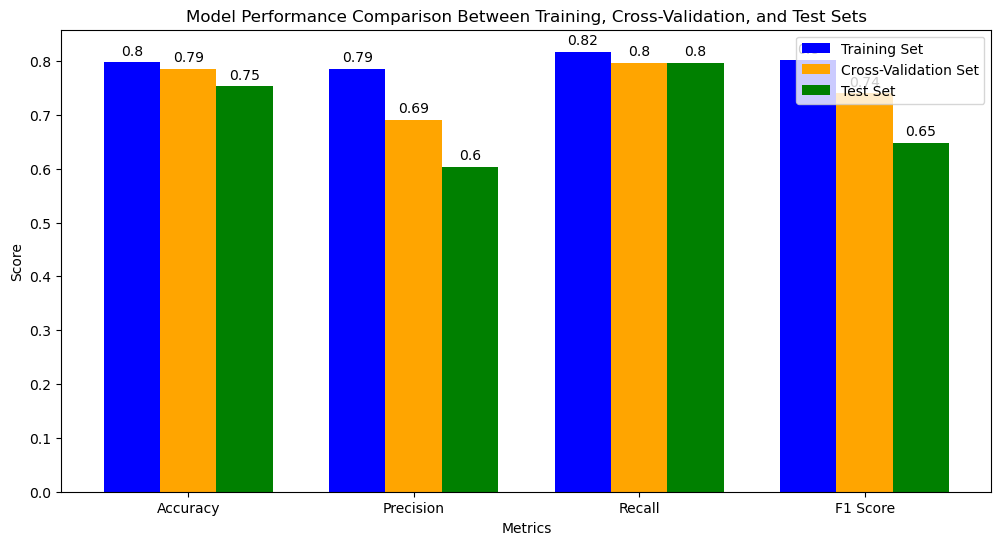

In [21]:
# Define metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Training set metrics
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]

# Cross-validation set metrics
cv_metrics = [accuracy_cv, precision_cv, recall_cv, f1_cv]

test_metrics = [accuracy_test, precision_test, recall_cv, f1_test]

# Set up positions for bar groups
bar_width = 0.25
index = np.arange(len(metrics))

# Plot the metrics for training, cross-validation, and test sets
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, train_metrics, bar_width, label='Training Set', color='blue')
bar2 = ax.bar(index + bar_width, cv_metrics, bar_width, label='Cross-Validation Set', color='orange')
bar3 = ax.bar(index + 2*bar_width, test_metrics, bar_width, label='Test Set', color='green')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison Between Training, Cross-Validation, and Test Sets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Display the scores on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

# Second snario, we have missing value

**we replace all missing value with mean**

In [22]:

# Create a copy of the DataFrame
train_data = df.copy()

# Specify columns to replace 0 with NaN
columns_to_replace = ['plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

# Replace 0 values with NaN only in specified columns
for column in columns_to_replace:
    train_data[column].replace(0, np.nan, inplace=True)

# Fill missing values with mean for specified columns excluding 'preg' and 'class'
train_data.fillna(train_data[columns_to_replace].mean(), inplace=True)

# Display the first 30 rows of the DataFrame
print(train_data.head(30))




    preg   plas       pres      skin        insu       mass   pedi   age  \
0    6.0  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50.0   
1    1.0   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31.0   
2    8.0  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32.0   
3    1.0   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21.0   
4    0.0  137.0  40.000000  35.00000  168.000000  43.100000  2.288  33.0   
5    5.0  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30.0   
6    3.0   78.0  50.000000  32.00000   88.000000  31.000000  0.248  26.0   
7   10.0  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29.0   
8    2.0  197.0  70.000000  45.00000  543.000000  30.500000  0.158  53.0   
9    8.0  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54.0   
10   4.0  110.0  92.000000  29.15342  155.548223  37.600000  0.191  30.0   
11  10.0  168.0  74.000000  29.15342  155.548223  38.000000  0.537  34.0   
12  10.0  13

# observe the correlation and distribution of features after replacing missing values with mean

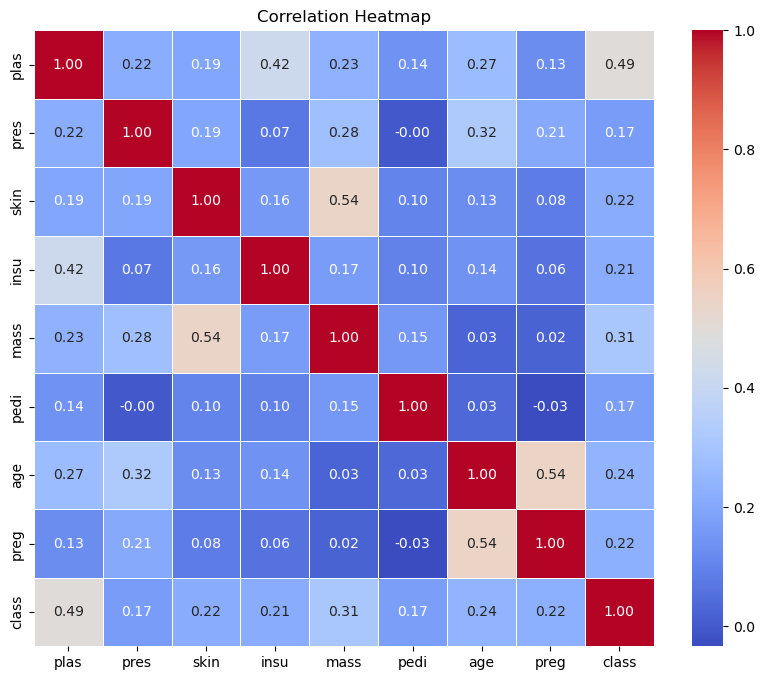

In [23]:
# check the correlation between features and target variable.

selected_columns = ["plas", "pres", "skin", "insu", "mass", "pedi", "age","preg","class"]
heatmap_data = train_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


# Define x_train and y_train(2)

In [24]:
X = np.array(train_data[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']])
y = np.array(train_data['class'])

X = X.reshape((768, 8))  

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs X is: (768, 8)
the shape of the targets y is: (768,)


# Split data(2)

In [25]:
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross-validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross-validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

del x_, y_

the shape of the inputs X is: (768, 8)
the shape of the targets y is: (768,)
the shape of the training set (input) is: (460, 8)
the shape of the training set (target) is: (460,)

the shape of the cross-validation set (input) is: (154, 8)
the shape of the cross-validation set (target) is: (154,)

the shape of the test set (input) is: (154, 8)
the shape of the test set (target) is: (154,)


# Try different model--zeros replaced with Mean


In [26]:
# Fit PolynomialFeatures  on the training set
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

# Scale the polynomial features
scaler_linear = StandardScaler()
x_train_poly_scaled = scaler_linear.fit_transform(x_train_poly)
x_cv_poly_scaled = scaler_linear.transform(x_cv_poly)
x_test_poly_scaled = scaler_linear.transform(x_test_poly)

# Resample imbalanced data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_poly_scaled_resampled, y_train_resampled = oversampler.fit_resample(x_train_poly_scaled, y_train)



# logistic regression(2)

In [27]:
# Create and train a logistic regression model

logreg_model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
logreg_model.fit(x_train_poly_scaled_resampled, y_train_resampled)


# make prediction with training set
yhat_train = logreg_model.predict(x_train_poly_scaled_resampled)

# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train_resampled, yhat_train)

# Calculate precision, recall, and f1 for training set
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)

# Print the confusion matrix, accuracy, precision, recall, f1 for training set
print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")



# Make predictions on the cross validation set

yhat_cv = logreg_model.predict(x_cv_poly_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_cv, yhat_cv)

# Calculate accuracy
accuracy = accuracy_score(y_cv, yhat_cv)

# calculate the precision,recall, f1 
precision = precision_score(y_cv, yhat_cv)
recall = recall_score(y_cv, yhat_cv)
f1 = f1_score(y_cv, yhat_cv)



# Now, print the results for the cross-validation set
print("\nCross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Training Set Results:
Confusion Matrix:
[[235  66]
 [ 70 231]]

Accuracy: 0.7740863787375415
Precision: 0.7777777777777778
Recall: 0.7674418604651163
F1 Score: 0.7725752508361206

Cross-Validation Set Results:
Confusion Matrix:
[[71 24]
 [18 41]]

Accuracy: 0.7272727272727273
Precision: 0.6307692307692307
Recall: 0.6949152542372882
F1 Score: 0.6612903225806452


# RandomForest(2)

In [28]:
# we use here poly_degree 1 to avoid overfitting.
# Fit PolynomialFeatures  on the training set
poly = PolynomialFeatures(degree=1, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_cv_poly = poly.transform(x_cv)
x_test_poly = poly.transform(x_test)

# Scale the polynomial features
scaler_linear = StandardScaler()
x_train_poly_scaled = scaler_linear.fit_transform(x_train_poly)
x_cv_poly_scaled = scaler_linear.transform(x_cv_poly)
x_test_poly_scaled = scaler_linear.transform(x_test_poly)

# Resample imbalanced data
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_poly_scaled_resampled, y_train_resampled = oversampler.fit_resample(x_train_poly_scaled, y_train)



In [29]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_leaf=22,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42
)


best_rf_model.fit(x_train_poly_scaled_resampled, y_train_resampled)

yhat_cv = best_rf_model.predict(x_cv_poly_scaled)

yhat_train = best_rf_model.predict(x_train_poly_scaled_resampled)

conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)
accuracy_train = accuracy_score(y_train_resampled, yhat_train)
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)


conf_matrix_cv = confusion_matrix(y_cv, yhat_cv)
accuracy_cv = accuracy_score(y_cv, yhat_cv)
precision_cv = precision_score(y_cv, yhat_cv)
recall_cv = recall_score(y_cv, yhat_cv)
f1_cv = f1_score(y_cv, yhat_cv)


print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")


print("Cross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix_cv)
print(f"\nAccuracy: {accuracy_cv}")
print(f"Precision: {precision_cv}")
print(f"Recall: {recall_cv}")
print(f"F1 Score: {f1_cv}")






Training Set Results:
Confusion Matrix:
[[233  68]
 [ 45 256]]

Accuracy: 0.8122923588039868
Precision: 0.7901234567901234
Recall: 0.8504983388704319
F1 Score: 0.8191999999999999
Cross-Validation Set Results:
Confusion Matrix:
[[70 25]
 [11 48]]

Accuracy: 0.7662337662337663
Precision: 0.6575342465753424
Recall: 0.8135593220338984
F1 Score: 0.7272727272727273


# Decision Tree (2)

In [29]:
# Create a new Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    ccp_alpha=0.01  
)



# Train the new model
best_dt_model.fit(x_train_poly_scaled_resampled, y_train_resampled)

# Make predictions on the cross-validation set
yhat_cv = best_dt_model.predict(x_cv_poly_scaled)



# Make predictions on the training set
yhat_train = best_dt_model.predict(x_train_poly_scaled_resampled)

# Calculate confusion matrix, accuracy, precision, recall, f1 for training set
conf_matrix_train = confusion_matrix(y_train_resampled, yhat_train)
accuracy_train = accuracy_score(y_train_resampled, yhat_train)
precision_train = precision_score(y_train_resampled, yhat_train)
recall_train = recall_score(y_train_resampled, yhat_train)
f1_train = f1_score(y_train_resampled, yhat_train)


conf_matrix_cv = confusion_matrix(y_cv, yhat_cv)
accuracy_cv = accuracy_score(y_cv, yhat_cv)
precision_cv = precision_score(y_cv, yhat_cv)
recall_cv = recall_score(y_cv, yhat_cv)
f1_cv = f1_score(y_cv, yhat_cv)


print("Training Set Results:")
print("Confusion Matrix:")
print(conf_matrix_train)
print(f"\nAccuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")


print("Cross-Validation Set Results:")
print("Confusion Matrix:")
print(conf_matrix_cv)
print(f"\nAccuracy: {accuracy_cv}")
print(f"Precision: {precision_cv}")
print(f"Recall: {recall_cv}")
print(f"F1 Score: {f1_cv}")




Training Set Results:
Confusion Matrix:
[[233  68]
 [ 48 253]]

Accuracy: 0.8073089700996677
Precision: 0.7881619937694704
Recall: 0.840531561461794
F1 Score: 0.8135048231511254
Cross-Validation Set Results:
Confusion Matrix:
[[74 21]
 [11 48]]

Accuracy: 0.7922077922077922
Precision: 0.6956521739130435
Recall: 0.8135593220338984
F1 Score: 0.75


# Final evaluation(2)

In [30]:

# Decision tree gives the best result with cv data, because of that, we will test the test data with  decision Tree model.

yhat_test = best_dt_model.predict(x_test_poly_scaled)

conf_matrix_test = confusion_matrix(y_test, yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
precision_test = precision_score(y_test, yhat_test)
recall_test = recall_score(y_test, yhat_test)
f1_test = f1_score(y_test, yhat_test)

print("test Set Results:")
print("Confusion Matrix:")
print(conf_matrix_test)
print(f"\nAccuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")



test Set Results:
Confusion Matrix:
[[81 23]
 [14 36]]

Accuracy: 0.7597402597402597
Precision: 0.6101694915254238
Recall: 0.72
F1 Score: 0.6605504587155964


# Final model performance visualization(2)

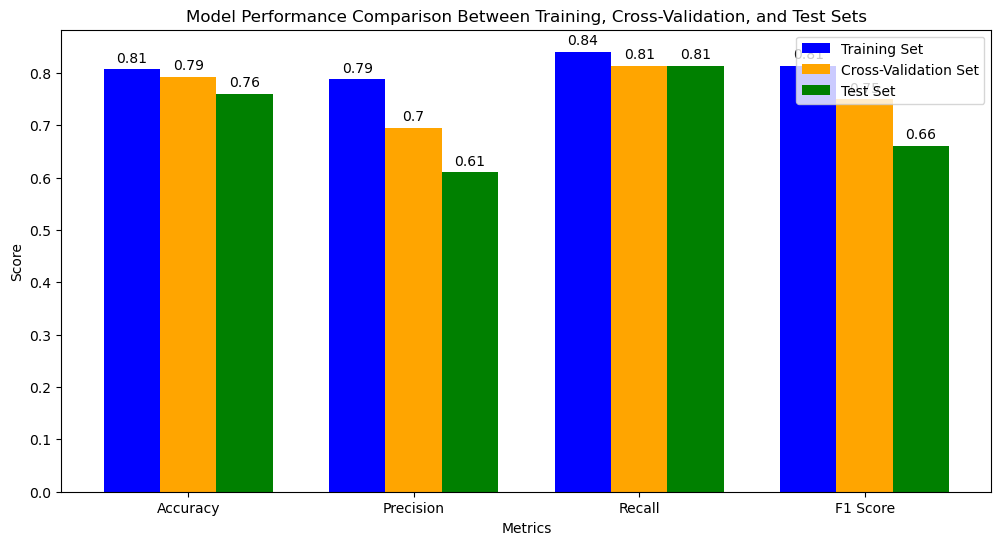

In [31]:
# Define metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Training set metrics
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]

# Cross-validation set metrics
cv_metrics = [accuracy_cv, precision_cv, recall_cv, f1_cv]

test_metrics = [accuracy_test, precision_test, recall_cv, f1_test]

# Set up positions for bar groups
bar_width = 0.25
index = np.arange(len(metrics))

# Plot the metrics for training, cross-validation, and test sets
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, train_metrics, bar_width, label='Training Set', color='blue')
bar2 = ax.bar(index + bar_width, cv_metrics, bar_width, label='Cross-Validation Set', color='orange')
bar3 = ax.bar(index + 2*bar_width, test_metrics, bar_width, label='Test Set', color='green')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison Between Training, Cross-Validation, and Test Sets')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Display the scores on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()

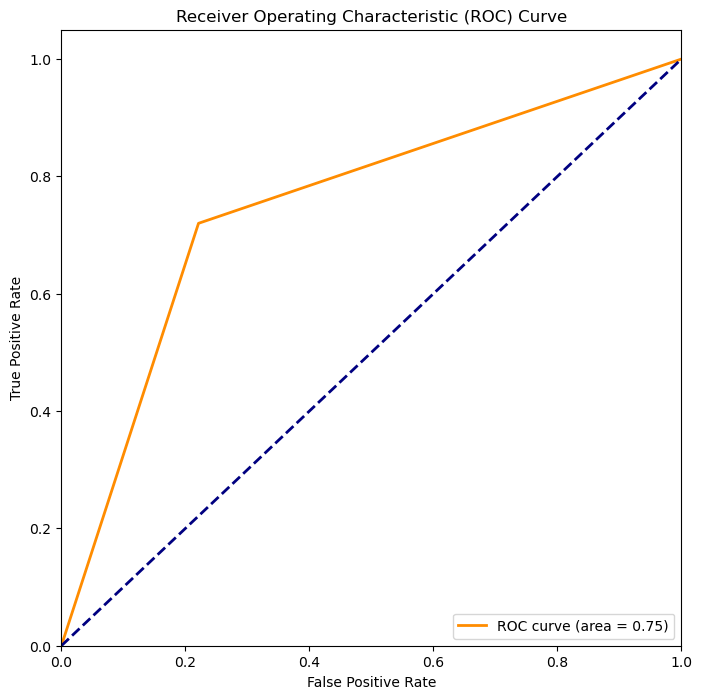

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, yhat_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Decision Tree performed best in the both scenario, however, Decision Tree in second scenario performed in test set slightly better(76%)than Decision Tree in first scenario(75%). The accuracy of selected final model is: 76%**